## Lead Scoring Case Study

#### Primary Goal 

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

###  DSC43 
#### Group : Manaswini / Srivatsa

### Step 1: Importing and EDA 

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [3]:
# Importing all datasets
lsData = pd.read_csv("Leads.csv")
lsData.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
round((lsData.isnull().sum()/len(lsData.index)),2) *100


Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

#### Lets Drop all Columns where over 45% of the data is missing  

In [6]:
lsData=lsData.drop(columns=['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [7]:
round((lsData.isnull().sum()/len(lsData.index)),2) *100


Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [8]:
lsData["Lead Quality"].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

#### We observe the Lead Quality has over 50% data missing and the values available such as Might Be /  Not Sure - are of no use 

In [9]:
lsData = lsData.drop(columns=["Lead Quality"])

In [10]:
##### Next Highest % Missing is Tags - Lets examine the same 

In [11]:
lsData["Tags"].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [12]:
round(lsData["Tags"].value_counts() / lsData["Tags"].isnull().sum(),3) * 100 

Will revert after reading the email                  61.8
Ringing                                              35.9
Interested in other courses                          15.3
Already a student                                    13.9
Closed by Horizzon                                   10.7
switched off                                          7.2
Busy                                                  5.5
Lost to EINS                                          5.2
Not doing further education                           4.3
Interested  in full time MBA                          3.5
Graduation in progress                                3.3
invalid number                                        2.5
Diploma holder (Not Eligible)                         1.9
wrong number given                                    1.4
opp hangup                                            1.0
number not provided                                   0.8
in touch with EINS                                    0.4
Lost to Others

###### "Will revert after reading the email" has ~62% of the values - hence impute with the same 

In [13]:
# Impuaating the missing data in the tags column with 'Will revert after reading the email'
lsData['Tags']=lsData['Tags'].replace(np.nan,'Will revert after reading the email')

In [14]:
round((lsData.isnull().sum()/len(lsData.index)),2) *100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

###### "What matters most to you in choosing a course"  has 29% Missing Values  

In [15]:
# Finding the percentage of the different categories of this column:
lsData['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

In [16]:
### 99.95% of the Values are Better Career Prospects -- We can get rid of this column 
lsData = lsData.drop(columns=['What matters most to you in choosing a course'])

##### "What is your current occupation" has 29% Values Missing

In [17]:
# Finding the percentage of the different categories of this column:
round(lsData['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

In [18]:
## We will replace the Null values with "Unemployed "
lsData['What is your current occupation']=lsData['What is your current occupation'].replace(np.nan,'Unemployed')

##### "Country" has 27% values Missing - examining the same  

In [19]:
# Finding the percentage of the different categories of this column:
round(lsData['Country'].value_counts(normalize=True),2)*100

India                   96.0
United States            1.0
United Arab Emirates     1.0
Singapore                0.0
Saudi Arabia             0.0
United Kingdom           0.0
Australia                0.0
Qatar                    0.0
Hong Kong                0.0
Bahrain                  0.0
Oman                     0.0
France                   0.0
unknown                  0.0
South Africa             0.0
Nigeria                  0.0
Germany                  0.0
Kuwait                   0.0
Canada                   0.0
Sweden                   0.0
China                    0.0
Asia/Pacific Region      0.0
Uganda                   0.0
Bangladesh               0.0
Italy                    0.0
Belgium                  0.0
Netherlands              0.0
Ghana                    0.0
Philippines              0.0
Russia                   0.0
Switzerland              0.0
Vietnam                  0.0
Denmark                  0.0
Tanzania                 0.0
Liberia                  0.0
Malaysia      

In [20]:
## 96% of the values are india - and if we impute the same for the missing values - the Data would be highly Skewed
## Hence WE can drop the column County 
lsData = lsData.drop(columns=['Country'])

In [21]:
### Reviewing the list of Columns again 

In [22]:
round((lsData.isnull().sum()/len(lsData.index)),2) *100

Prospect ID                                  0.0
Lead Number                                  0.0
Lead Origin                                  0.0
Lead Source                                  0.0
Do Not Email                                 0.0
Do Not Call                                  0.0
Converted                                    0.0
TotalVisits                                  1.0
Total Time Spent on Website                  0.0
Page Views Per Visit                         1.0
Last Activity                                1.0
Specialization                              16.0
How did you hear about X Education          24.0
What is your current occupation              0.0
Search                                       0.0
Magazine                                     0.0
Newspaper Article                            0.0
X Education Forums                           0.0
Newspaper                                    0.0
Digital Advertisement                        0.0
Through Recommendati

In [23]:
####### Lets Review column "Specialization ""

In [24]:
round(lsData['Specialization'].value_counts(normalize=True),2)*100

Select                               25.0
Finance Management                   13.0
Human Resource Management            11.0
Marketing Management                 11.0
Operations Management                 6.0
Business Administration               5.0
IT Projects Management                5.0
Supply Chain Management               4.0
Banking, Investment And Insurance     4.0
Travel and Tourism                    3.0
Media and Advertising                 3.0
International Business                2.0
Healthcare Management                 2.0
Hospitality Management                1.0
E-COMMERCE                            1.0
Retail Management                     1.0
Rural and Agribusiness                1.0
E-Business                            1.0
Services Excellence                   1.0
Name: Specialization, dtype: float64

In [25]:
#### FOR further analysis lets use graphical representation

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt 

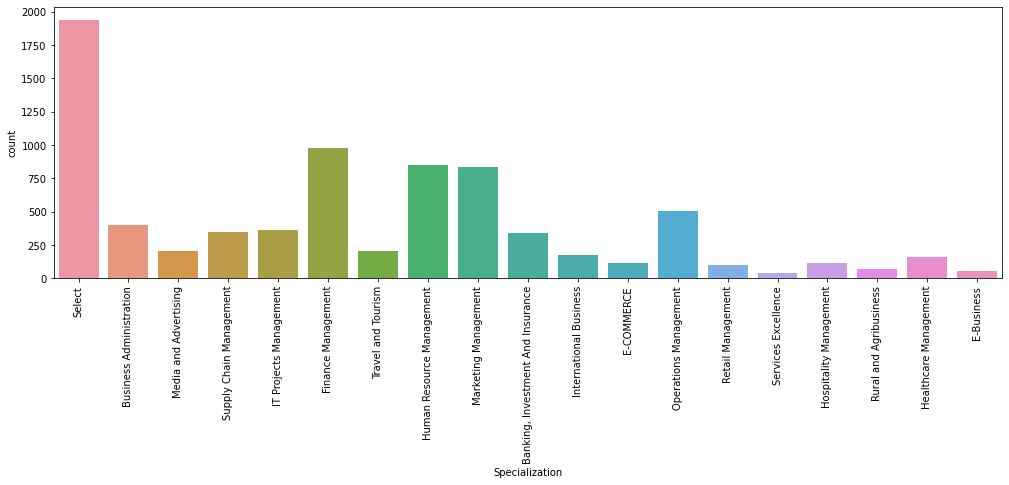

In [27]:
plt.figure(figsize=(17,5))
sns.countplot(lsData['Specialization'])
plt.xticks(rotation=90)
plt.show()

##### We observe there is a "select" - as one of the options - It is equivalent to Null value 
 The select Option is there in other Categorcal Variables also 
We will set all select values in data set to Null and reexamine the Null Counts in each column 

In [28]:
# Converting 'Select' values to NaN.
lsData = lsData.replace('Select', np.nan)

In [29]:
round((lsData.isnull().sum()/len(lsData.index)),2) *100

Prospect ID                                  0.0
Lead Number                                  0.0
Lead Origin                                  0.0
Lead Source                                  0.0
Do Not Email                                 0.0
Do Not Call                                  0.0
Converted                                    0.0
TotalVisits                                  1.0
Total Time Spent on Website                  0.0
Page Views Per Visit                         1.0
Last Activity                                1.0
Specialization                              37.0
How did you hear about X Education          78.0
What is your current occupation              0.0
Search                                       0.0
Magazine                                     0.0
Newspaper Article                            0.0
X Education Forums                           0.0
Newspaper                                    0.0
Digital Advertisement                        0.0
Through Recommendati

In [30]:
#### We See that "How How did you hear about X Education" - has 78% Null values and Lead Profile has 74% Null Values 
## Lets Drop both the columns 

In [31]:
lsData = lsData.drop(columns=['How did you hear about X Education','Lead Profile'])

In [32]:
##### Reviewing Specialization Column Again 

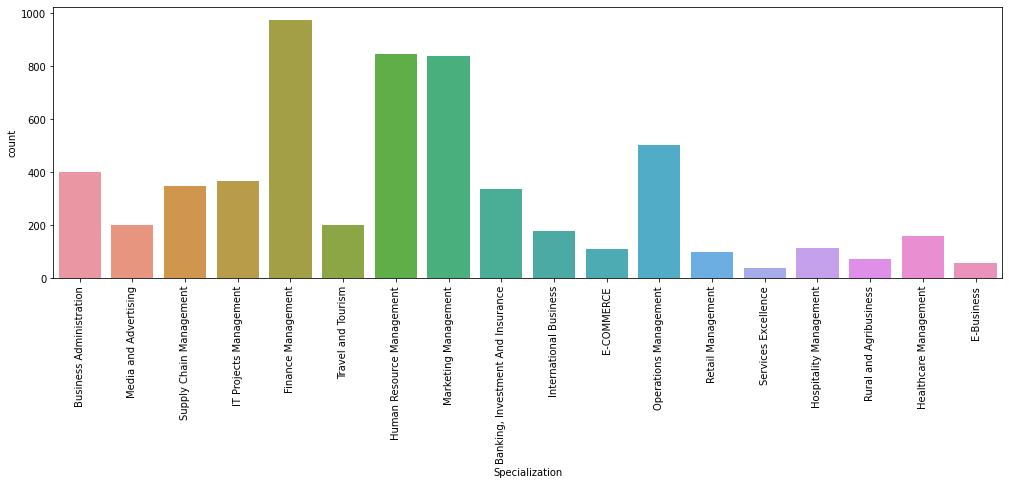

In [33]:
plt.figure(figsize=(17,5))
sns.countplot(lsData['Specialization'])
plt.xticks(rotation=90)
plt.show()

##### From the Above we see that we cannot replacing Nulls with another value - may not be the best option 
Lets Create another Specialization category - Others for Null Values possible that there are folks with "Other" Specialzations 

In [34]:
# Creating a separate category called 'Others' for this 
lsData['Specialization'] = lsData['Specialization'].replace(np.nan, 'Others')

In [35]:
#### Lets Review "City"

In [36]:
lsData["City"].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

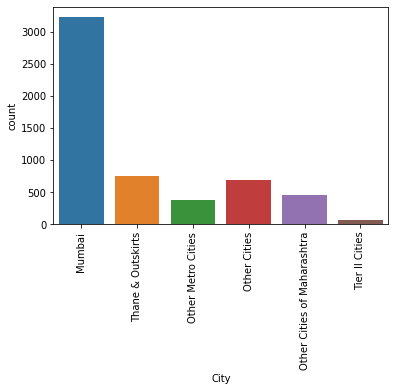

In [37]:
sns.countplot(lsData['City'])
plt.xticks(rotation=90)
plt.show()

In [38]:
### We can impute the missing values for City with "Mumbai" - since it is the highest occuring 
lsData['City']=lsData['City'].replace(np.nan,'Mumbai')

In [39]:
### Reviwing the Missing Values Count again 

In [40]:
round((lsData.isnull().sum()/len(lsData.index)),2) *100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

###### Now we have columns with only 1% of values missing - We can remove such rows 

In [41]:
# Dropping null value Rows 
lsData.dropna(inplace = True)

In [42]:
round((lsData.isnull().sum()/len(lsData.index)),2) *100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

##### ALL MISSING VALUES HAVE BEEN ADDRESSED 

In [43]:
lsData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                       

### BIVARIATE ANALYSIS 

##### Comparing Variables in relation to "Converted" - Our Target Variable

In [44]:
Converted = (sum(lsData['Converted'])/len(lsData['Converted'].index))*100
Converted

37.85541106458012

###### Coversion Rate based on the Data Set is 37 % 

In [45]:
### NUMERICAL VARIABLES

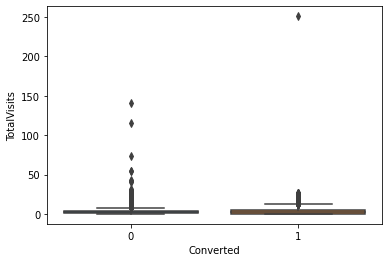

In [46]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lsData )
plt.show()

In [47]:
### There are many Outliers lets cap the Outliers to 98 Percentile 
percentiles = lsData["TotalVisits"].quantile([0.05, 0.95]).values
lsData["TotalVisits"][lsData["TotalVisits"] <= percentiles[0]] = percentiles[0]
lsData["TotalVisits"][lsData["TotalVisits"] >= percentiles[1]] = percentiles[1]

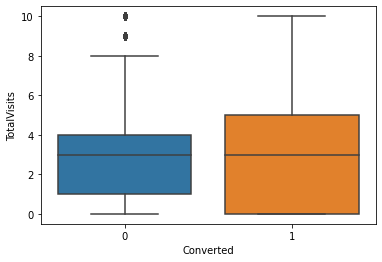

In [48]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lsData )
plt.show()

##### INFER : Total Visits does not indicate a significant cotributor to Conversion as Median are same and Total Visits overlap 

In [49]:
#### Total Time Spent on Website

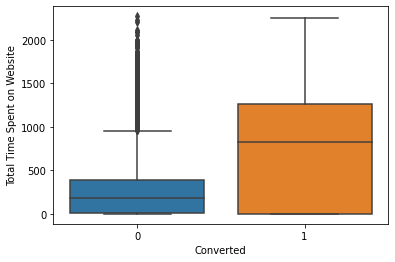

In [50]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lsData )
plt.show()

##### "Total Time Spent on Website" -  is an indicator of Conversion as there is significant difference  

In [51]:
#### Page Views Per Visit

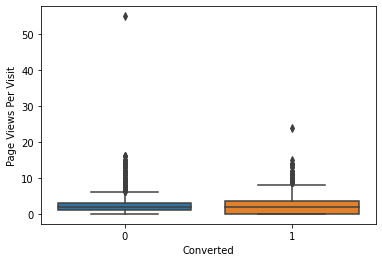

In [52]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lsData )
plt.show()

In [53]:
### There are many Outliers lets cap the Outliers to 98 Percentile 
percentiles = lsData["Page Views Per Visit"].quantile([0.05, 0.98]).values
lsData["Page Views Per Visit"][lsData["Page Views Per Visit"] <= percentiles[0]] = percentiles[0]
lsData["Page Views Per Visit"][lsData["Page Views Per Visit"] >= percentiles[1]] = percentiles[1]

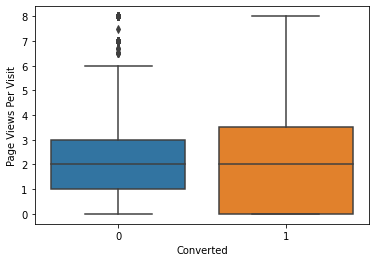

In [54]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lsData )
plt.show()

##### From the Box Plot / Prelim Analysis - Page views does not seem to show a significant difference with regards to convesion


#### CATEGORICAL VARIABLES 

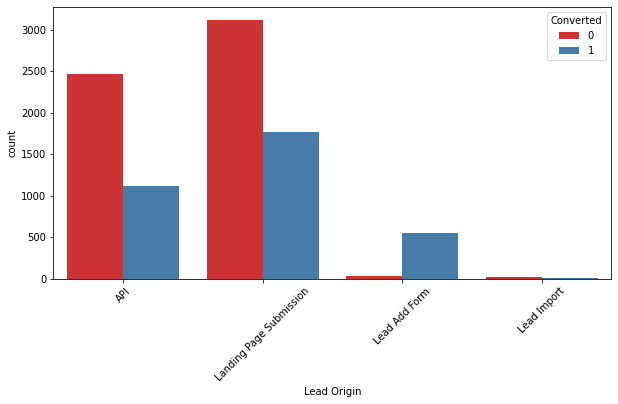

In [55]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lsData,palette='Set1')
plt.xticks(rotation = 45)
plt.show()

In [56]:
### LEAD SOURCE

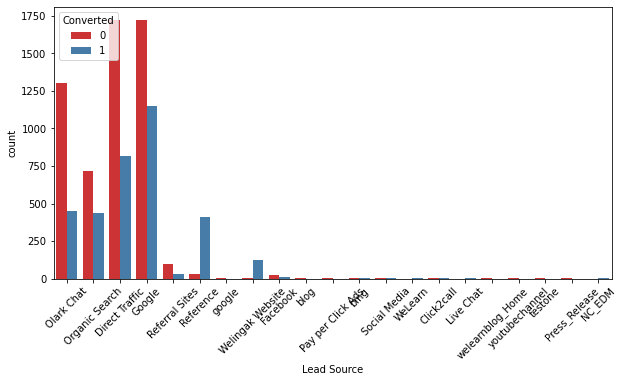

In [57]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lsData,palette='Set1')
plt.xticks(rotation = 45)
plt.show()

In [58]:
##### We observe that there are many categories with very low values - we can group them together as Others 
lsData['Lead Source'] = lsData['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog','Facebook', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

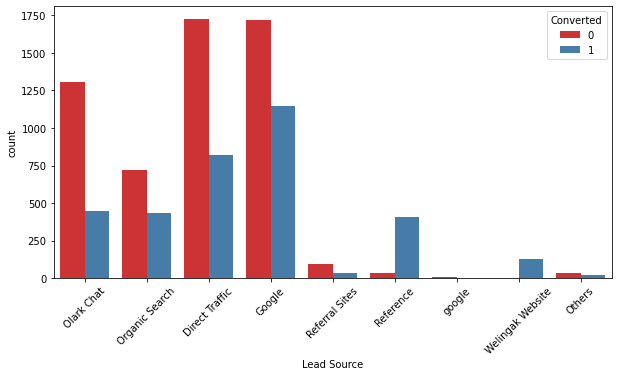

In [59]:
## Redraw the Bar chart 
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lsData,palette='Set1')
plt.xticks(rotation = 45)
plt.show()

In [60]:
# Need to replace 'google' with 'Google'  - there are both versions above 
lsData['Lead Source'] = lsData['Lead Source'].replace(['google'], 'Google')

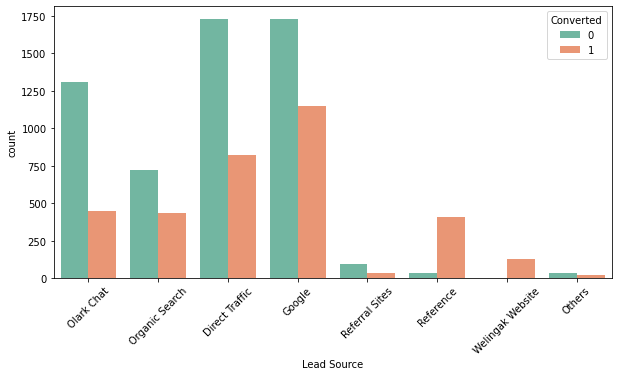

In [61]:
## Redraw the Bar chart 
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lsData,palette='Set2')
plt.xticks(rotation = 45)
plt.show()

In [62]:
##### Do Not Email / Do Not Call 

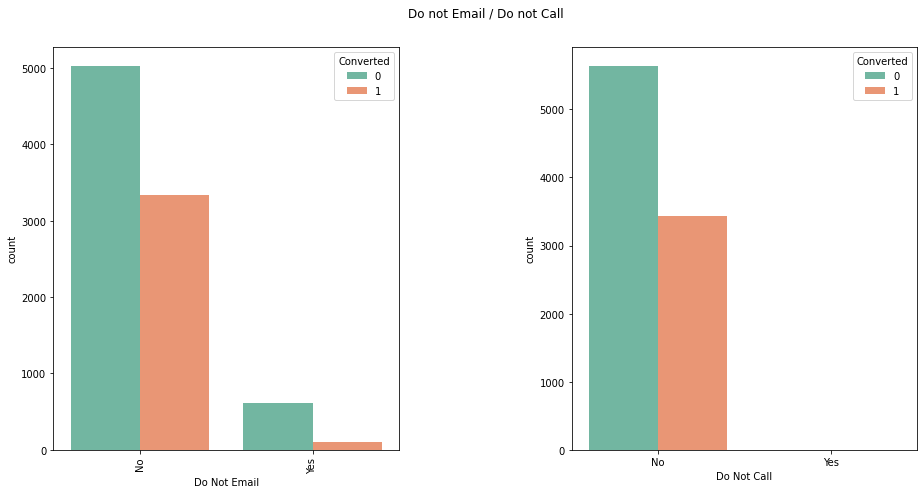

In [63]:
fig = plt.figure(figsize=[15,7])
fig.suptitle("Do not Email / Do not Call", ha='center')
plt.subplot(1,2,1)
sns.countplot(x = "Do Not Email", hue = "Converted", data = lsData,palette='Set2')
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.countplot(x = "Do Not Call", hue = "Converted", data = lsData,palette='Set2')
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.5,hspace=0.4)
plt.show()

In [64]:
## Do Not Call - has no yes values - so the entire column has only NO as value - can be dropped  

In [65]:
lsData = lsData.drop(columns=["Do Not Call"])

In [66]:
### LOOKING AT TAGS 

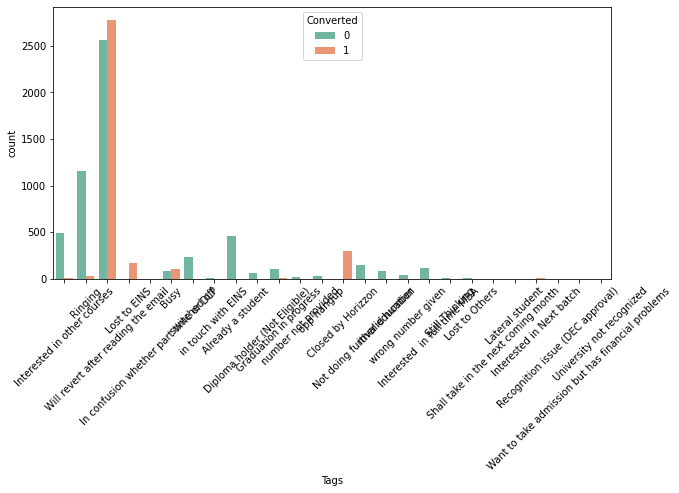

In [67]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Tags", hue = "Converted", data = lsData,palette='Set2')
plt.xticks(rotation = 45)
plt.show()

In [68]:
## since Tags are created by Sales after they contact the potential leads - this cannot be used in the Model 


In [69]:
lsData = lsData.drop(columns=["Tags"])

In [70]:
## LAST ACTIVITY COLUMN 

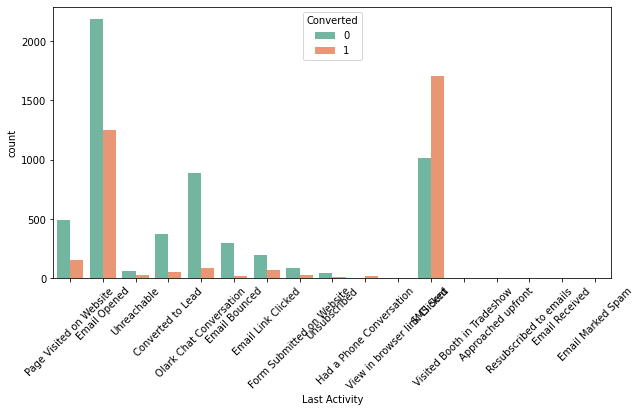

In [71]:
### Last Activity 
## Redraw the Bar chart 
plt.figure(figsize=(10,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = lsData,palette='Set2')
plt.xticks(rotation = 45)
plt.show()

In [72]:
### We See that there are many Last Activity categories with low values - grouping to Other Activites 
lsData["Last Activity"].value_counts(normalize=True)

Email Opened                    0.378223
SMS Sent                        0.299317
Olark Chat Conversation         0.107119
Page Visited on Website         0.070531
Converted to Lead               0.047168
Email Bounced                   0.034384
Email Link Clicked              0.029425
Form Submitted on Website       0.012784
Unreachable                     0.009918
Unsubscribed                    0.006502
Had a Phone Conversation        0.002755
View in browser link Clicked    0.000661
Approached upfront              0.000551
Email Received                  0.000220
Email Marked Spam               0.000220
Visited Booth in Tradeshow      0.000110
Resubscribed to emails          0.000110
Name: Last Activity, dtype: float64

In [73]:
# We can club the last activities to "Other_Activity" which are having less data.
lsData['Last Activity'] = lsData['Last Activity'].replace(['Had a Phone Conversation', 
                                                              'View in browser link Clicked',
                                                              "Resubscribed to emails","Unreachable",
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails',
                                                              "Unsubscribed",
                                                        'Email Received', 'Email Marked Spam'], 'Other_Activity')

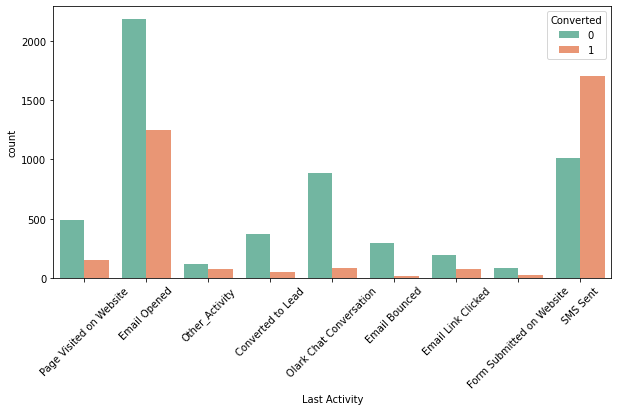

In [74]:
## Redraw the Bar chart 
plt.figure(figsize=(10,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = lsData,palette='Set2')
plt.xticks(rotation = 45)
plt.show()

In [75]:
### Specialization

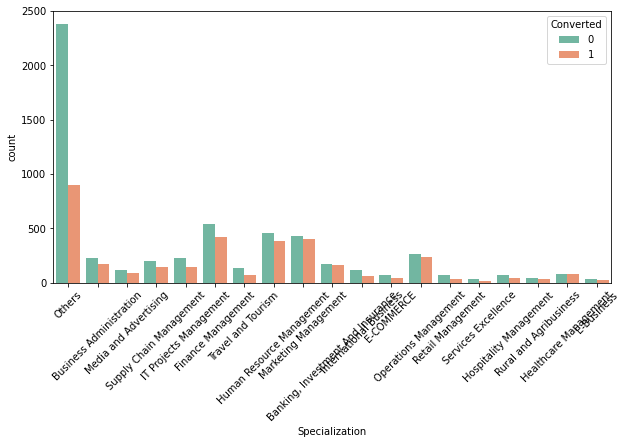

In [76]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Specialization", hue = "Converted", data = lsData,palette='Set2')
plt.xticks(rotation = 45)
plt.show()

In [77]:
#### All Media Related Together 

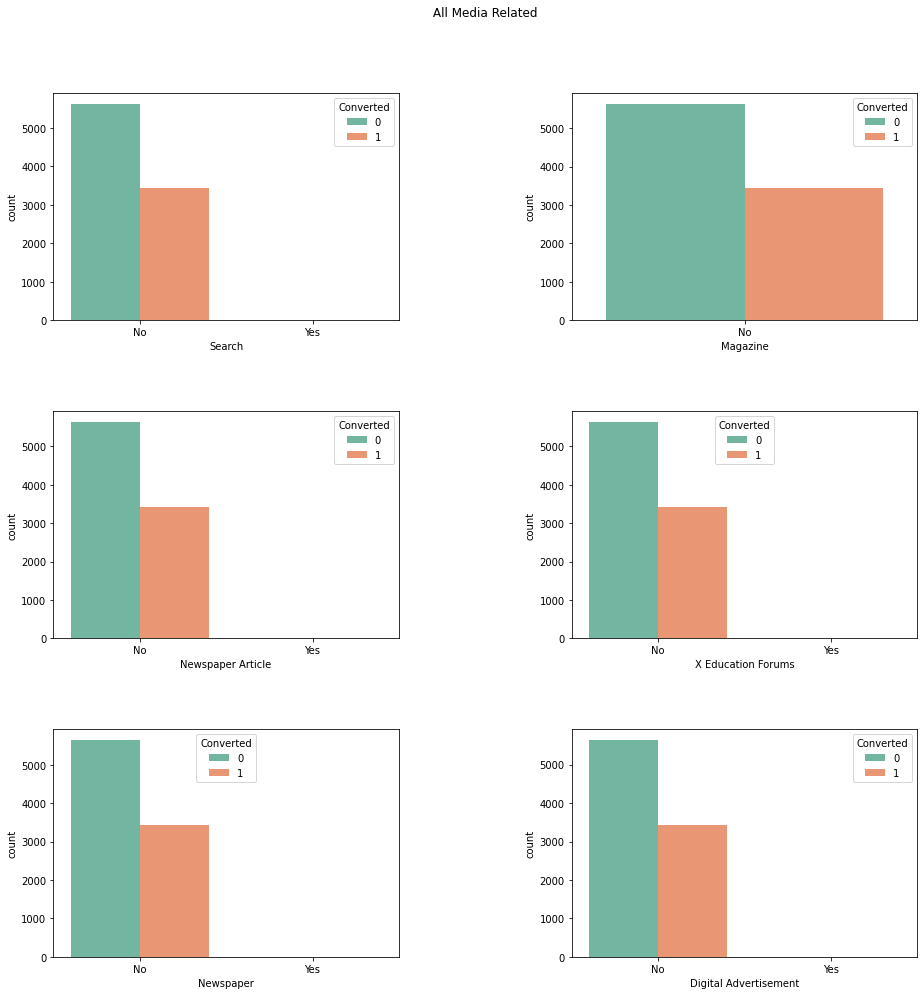

In [78]:
fig = plt.figure(figsize=[15,15])
fig.suptitle(" All Media Related ", ha='center')
plt.subplot(3,2,1)
sns.countplot(x = "Search", hue = "Converted", data = lsData,palette='Set2')
plt.subplot(3,2,2)
sns.countplot(x = "Magazine", hue = "Converted", data = lsData,palette='Set2')
plt.subplot(3,2,3)
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lsData,palette='Set2')
plt.subplot(3,2,4)
sns.countplot(x = "X Education Forums", hue = "Converted", data = lsData,palette='Set2')
plt.subplot(3,2,5)
sns.countplot(x = "Newspaper", hue = "Converted", data = lsData,palette='Set2')
plt.subplot(3,2,6)
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lsData,palette='Set2')
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.5,hspace=0.4)
plt.show()

##### We See that All Media Related Columns have Mostly No as value - ( or just one value across the column ) 
###### Hence we can Drop these columns 

In [79]:
lsData = lsData.drop(columns=["Search","Magazine", "Newspaper Article",
                              "X Education Forums","Newspaper","Digital Advertisement"])

In [80]:
### All Other Columns 

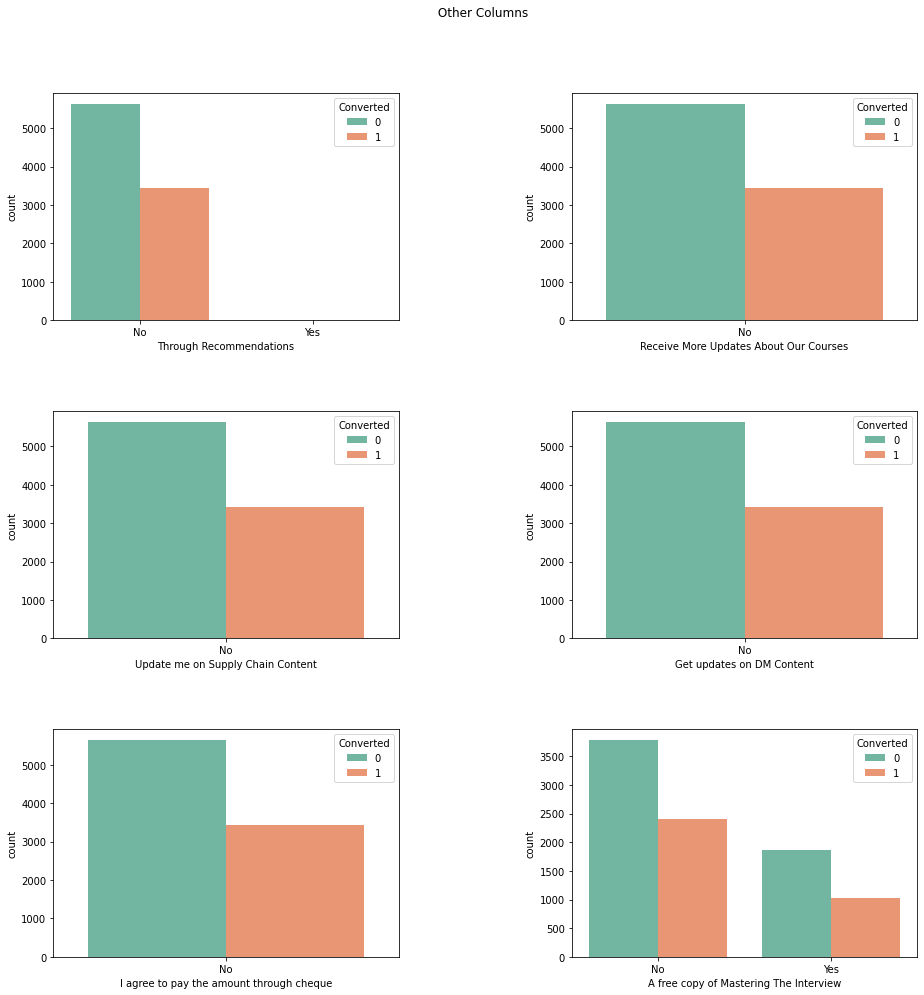

In [81]:
fig = plt.figure(figsize=[15,15])
fig.suptitle(" Other Columns  ", ha='center')
plt.subplot(3,2,1)
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lsData,palette='Set2')
plt.subplot(3,2,2)
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lsData,palette='Set2')
plt.subplot(3,2,3)
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = lsData,palette='Set2')
plt.subplot(3,2,4)
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lsData,palette='Set2')
plt.subplot(3,2,5)
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lsData,palette='Set2')
plt.subplot(3,2,6)
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lsData,palette='Set2')
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.5,hspace=0.4)
plt.show()

######  Similar to the Media Related - here too we find that None of these columns are indicator of Conversion 
###### We See that most have a single value No across the column - hence we can drop these columns 

In [82]:
lsData = lsData.drop(columns=["Through Recommendations",
                              "Receive More Updates About Our Courses",
                              "Update me on Supply Chain Content",
                              "Get updates on DM Content",
                              "I agree to pay the amount through cheque",
                              "A free copy of Mastering The Interview"])

In [83]:
lsData.shape

(9074, 14)

In [84]:
lsData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Number                      9074 non-null   int64  
 2   Lead Origin                      9074 non-null   object 
 3   Lead Source                      9074 non-null   object 
 4   Do Not Email                     9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

In [85]:
lsData.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.191867,482.887481,2.327902
std,23348.029512,0.485053,2.780618,545.256560,1.942767
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,10.000000,2272.000000,8.000000


In [86]:
## We can Remove the Lead Number - this is just an ID Column 
lsData = lsData.drop(columns=["Lead Number"])

In [87]:
lsData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Converted                        9074 non-null   int64  
 5   TotalVisits                      9074 non-null   float64
 6   Total Time Spent on Website      9074 non-null   int64  
 7   Page Views Per Visit             9074 non-null   float64
 8   Last Activity                    9074 non-null   object 
 9   Specialization                   9074 non-null   object 
 10  What is your current occupation  9074 non-null   object 
 11  City                             9074 non-null   object 
 12  Last Notable Activit

### Prepare the Data for Logistic regression 

#### Converting Yes/No to binary variables

In [88]:
vars=['Do Not Email']
def binary_map(a):
    return a.map({'Yes':1, "No":0})
lsData[vars]=lsData[vars].apply(binary_map)

#### Creating dummy variables for categorical features

In [89]:
dum_cat_var = pd.get_dummies(lsData[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dum_cat_var.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Concatenating dummy data set and original data set

In [90]:
lsData=pd.concat([lsData, dum_cat_var], axis=1)
lsData.head(20)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.00,Page Visited on Website,Others,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.50,Email Opened,Others,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.00,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.00,Other_Activity,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.00,Converted to Lead,Others,...,0,0,1,0,0,0,0,0,0,0
5,2058ef08-2858-443e-a01f-a9237db2f5ce,API,Olark Chat,0,0,0.0,0,0.00,Olark Chat Conversation,Others,...,0,0,1,0,0,0,0,0,0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,Landing Page Submission,Google,0,1,2.0,1640,2.00,Email Opened,Supply Chain Management,...,0,0,1,0,0,0,0,0,0,0
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,API,Olark Chat,0,0,0.0,0,0.00,Olark Chat Conversation,Others,...,0,0,1,0,0,0,0,0,0,0
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,Landing Page Submission,Direct Traffic,0,0,2.0,71,2.00,Email Opened,IT Projects Management,...,0,0,0,0,0,0,0,0,0,0
9,af465dfc-7204-4130-9e05-33231863c4b5,API,Google,0,0,4.0,58,4.00,Email Opened,Finance Management,...,0,0,0,0,0,0,0,0,0,0


In [91]:
lsData=lsData.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity'], axis = 1)

In [92]:
lsData.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0


#### Splitting the data into train and test data sets

In [93]:
from sklearn.model_selection import train_test_split

X = lsData.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [94]:
y=lsData['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Scaling the features

In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,-0.432779,-0.160255,-0.174341,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,-0.432779,-0.540048,-0.174341,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,-1.150329,-0.888650,-1.201012,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,-0.432779,1.643304,-0.174341,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0.643547,2.017593,0.082327,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [97]:
Converted = (sum(lsData['Converted'])/len(lsData['Converted'].index))*100
Converted

37.85541106458012

### Model Building

In [98]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [99]:
from sklearn.feature_selection import RFE

In [100]:
rfe = RFE (logreg, step=15)
rfe = rfe.fit(X_train, y_train)

In [101]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 4),
 ('Lead Source_Others', False, 3),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 4),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 3),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 3),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 3),
 ('Specialization_E-Busin

In [102]:
# Putting all the columns selected by RFE in a column
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       

In [103]:
X_train = X_train[col]

In [104]:
#Importing stats model package 
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2568.9
Date:                Mon, 17 Oct 2022   Deviance:                       5137.7
Time:                        00:07:52   Pearson chi2:                 6.42e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4079
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0655      0.889      1.199      0.231      -0.676       2.807
Do Not Email                                            -1.6457      0.209     -7.877      0.000      -2.055      -1.236
Total Time Spent on Website                              1.1111      0.041     27.039      0.000       1.031       1.192
Lead Origin_Landing Page Submission                     -1.1229      0.131     -8.603      0.000      -1.379      -0.867
Lead Origin_Lead Add Form                                1.4781      0.894      1.654      0.098      -0.274       3.230
Lead Origin_Lead Import                                  0.9052      0.477      1.898      0.058      -0.029       1.840
Lead Source_Olark Chat                                   1.1026      0.125      8.848      0.000       0.858       1.347
Lead Source_Reference                                    1.8623      0.918      2.029      0.042       0.064       3.661
Lead Source_Welingak Website                             4.4162      1.150      3.840      0.000       2.162       6.670
Last Activity_Email Link Clicked                         0.6789      0.412      1.649      0.099      -0.128       1.486
Last Activity_Email Opened                               0.8888      0.216      4.118      0.000       0.466       1.312
Last Activity_Olark Chat Conversation                   -0.3880      0.252     -1.542      0.123      -0.881       0.105
Last Activity_Other_Activity                             1.2130      0.369      3.291      0.001       0.491       1.936
Last Activity_Page Visited on Website                    0.5736      0.265      2.167      0.030       0.055       1.092
Last Activity_SMS Sent                                   1.3378      0.218      6.142      0.000       0.911       1.765
Specialization_Hospitality Management                   -0.4297      0.329     -1.307      0.191      -1.074       0.215
Specialization_Others                                   -1.1454      0.127     -9.037      0.000      -1.394      -0.897
What is your current occupation_Housewife               21.8035   1.53e+04      0.001      0.999   -2.99e+04    2.99e+04
What is your current occupation_Student                 -0.5180      0.678     -0.764      0.445      -1.847       0.811
What is your current occupation_Unemployed              -0.9645      0.639     -1.510      0.131      -2.217       0.288
What is your current occupation_Working Professional     1.6877      0.666      2.535      0.011       0.383       2.993
City_Tier II Cities                                     -0.5558      0.458     -1.213      0.225      -1.454       0.343
Last Notable Activity_Email Bounced                      0

In [105]:
# Importing variance_inflation_factor to find the behaviour of independent variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [106]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,What is your current occupation_Unemployed,160.73
3,Lead Origin_Lead Add Form,62.72
25,Last Notable Activity_Modified,60.36
23,Last Notable Activity_Email Opened,56.96
6,Lead Source_Reference,48.15
29,Last Notable Activity_SMS Sent,46.14
7,Lead Source_Welingak Website,15.53
19,What is your current occupation_Working Profes...,14.32
9,Last Activity_Email Opened,10.58
13,Last Activity_SMS Sent,8.75


The p-value for 'Last Notable Activity_View in browser link Clicked' is very high. Hence dropping the column

In [107]:
X_train.drop('Last Notable Activity_View in browser link Clicked', axis = 1, inplace = True)

In [108]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2569.8
Date:                Mon, 17 Oct 2022   Deviance:                       5139.6
Time:                        00:07:53   Pearson chi2:                 6.42e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4077
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9140      0.883      1.035      0.301      -0.817       2.645
Do Not Email                                            -1.6220      0.207     -7.833      0.000      -2.028      -1.216
Total Time Spent on Website                              1.1124      0.041     27.074      0.000       1.032       1.193
Lead Origin_Landing Page Submission                     -1.1145      0.130     -8.553      0.000      -1.370      -0.859
Lead Origin_Lead Add Form                                1.4844      0.894      1.660      0.097      -0.268       3.237
Lead Origin_Lead Import                                  0.9121      0.477      1.913      0.056      -0.022       1.846
Lead Source_Olark Chat                                   1.1068      0.125      8.884      0.000       0.863       1.351
Lead Source_Reference                                    1.8612      0.918      2.028      0.043       0.062       3.660
Lead Source_Welingak Website                             4.4087      1.150      3.833      0.000       2.155       6.663
Last Activity_Email Link Clicked                         0.6806      0.412      1.654      0.098      -0.126       1.487
Last Activity_Email Opened                               0.8903      0.216      4.125      0.000       0.467       1.313
Last Activity_Olark Chat Conversation                   -0.3865      0.252     -1.536      0.124      -0.880       0.107
Last Activity_Other_Activity                             1.2101      0.369      3.279      0.001       0.487       1.933
Last Activity_Page Visited on Website                    0.5733      0.265      2.166      0.030       0.055       1.092
Last Activity_SMS Sent                                   1.3381      0.218      6.144      0.000       0.911       1.765
Specialization_Hospitality Management                   -0.4282      0.328     -1.304      0.192      -1.072       0.216
Specialization_Others                                   -1.1384      0.127     -8.994      0.000      -1.387      -0.890
What is your current occupation_Housewife               21.8035   1.53e+04      0.001      0.999   -2.99e+04    2.99e+04
What is your current occupation_Student                 -0.5195      0.678     -0.767      0.443      -1.848       0.809
What is your current occupation_Unemployed              -0.9656      0.639     -1.512      0.131      -2.217       0.286
What is your current occupation_Working Professional     1.6878      0.666      2.536      0.011       0.383       2.992
City_Tier II Cities                                     -0.5579      0.458     -1.218      0.223      -1.456       0.340
Last Notable Activity_Email Bounced                      0

In [109]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,What is your current occupation_Unemployed,158.62
3,Lead Origin_Lead Add Form,62.72
25,Last Notable Activity_Modified,59.64
23,Last Notable Activity_Email Opened,56.34
6,Lead Source_Reference,48.15
29,Last Notable Activity_SMS Sent,45.65
7,Lead Source_Welingak Website,15.53
19,What is your current occupation_Working Profes...,14.15
9,Last Activity_Email Opened,10.58
13,Last Activity_SMS Sent,8.75


The p-value for 'Last Notable Activity_Resubscribed to emails' is very high. Hence dropping the column

In [110]:
X_train.drop('Last Notable Activity_Resubscribed to emails', axis = 1, inplace = True)

In [111]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2570.4
Date:                Mon, 17 Oct 2022   Deviance:                       5140.8
Time:                        00:07:54   Pearson chi2:                 6.42e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4076
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0169      0.874      1.163      0.245      -0.696       2.730
Do Not Email                                            -1.6388      0.207     -7.920      0.000      -2.044      -1.233
Total Time Spent on Website                              1.1123      0.041     27.069      0.000       1.032       1.193
Lead Origin_Landing Page Submission                     -1.1131      0.130     -8.543      0.000      -1.368      -0.858
Lead Origin_Lead Add Form                                1.4847      0.894      1.660      0.097      -0.268       3.237
Lead Origin_Lead Import                                  0.9131      0.477      1.916      0.055      -0.021       1.847
Lead Source_Olark Chat                                   1.1099      0.125      8.913      0.000       0.866       1.354
Lead Source_Reference                                    1.8624      0.918      2.029      0.042       0.063       3.662
Lead Source_Welingak Website                             4.4116      1.150      3.835      0.000       2.157       6.666
Last Activity_Email Link Clicked                         0.6786      0.412      1.649      0.099      -0.128       1.485
Last Activity_Email Opened                               0.8886      0.216      4.117      0.000       0.466       1.312
Last Activity_Olark Chat Conversation                   -0.3894      0.252     -1.548      0.122      -0.883       0.104
Last Activity_Other_Activity                             1.2117      0.369      3.286      0.001       0.489       1.934
Last Activity_Page Visited on Website                    0.5734      0.265      2.166      0.030       0.055       1.092
Last Activity_SMS Sent                                   1.3375      0.218      6.140      0.000       0.911       1.764
Specialization_Hospitality Management                   -0.4285      0.329     -1.304      0.192      -1.073       0.216
Specialization_Others                                   -1.1369      0.127     -8.983      0.000      -1.385      -0.889
What is your current occupation_Housewife               21.8021   1.53e+04      0.001      0.999   -2.99e+04    2.99e+04
What is your current occupation_Student                 -0.5215      0.678     -0.769      0.442      -1.850       0.807
What is your current occupation_Unemployed              -0.9676      0.639     -1.515      0.130      -2.220       0.284
What is your current occupation_Working Professional     1.6858      0.666      2.533      0.011       0.381       2.990
City_Tier II Cities                                     -0.5566      0.458     -1.214      0.225      -1.455       0.342
Last Notable Activity_Email Bounced                      0

In [112]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,What is your current occupation_Unemployed,156.91
3,Lead Origin_Lead Add Form,62.72
25,Last Notable Activity_Modified,58.90
23,Last Notable Activity_Email Opened,55.72
6,Lead Source_Reference,48.15
28,Last Notable Activity_SMS Sent,45.14
7,Lead Source_Welingak Website,15.53
19,What is your current occupation_Working Profes...,14.01
9,Last Activity_Email Opened,10.58
13,Last Activity_SMS Sent,8.75


The p-value for 'What is your current occupation_Housewife' is very high. Hence dropping the column

In [113]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [114]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2572.4
Date:                Mon, 17 Oct 2022   Deviance:                       5144.8
Time:                        00:07:55   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4072
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.5149      0.839      1.806      0.071      -0.129       3.159
Do Not Email                                            -1.6427      0.207     -7.932      0.000      -2.049      -1.237
Total Time Spent on Website                              1.1112      0.041     27.060      0.000       1.031       1.192
Lead Origin_Landing Page Submission                     -1.1061      0.130     -8.498      0.000      -1.361      -0.851
Lead Origin_Lead Add Form                                1.4880      0.894      1.665      0.096      -0.264       3.240
Lead Origin_Lead Import                                  0.9146      0.477      1.919      0.055      -0.019       1.849
Lead Source_Olark Chat                                   1.1101      0.125      8.914      0.000       0.866       1.354
Lead Source_Reference                                    1.8647      0.918      2.032      0.042       0.066       3.663
Lead Source_Welingak Website                             4.4090      1.150      3.834      0.000       2.155       6.663
Last Activity_Email Link Clicked                         0.6798      0.411      1.652      0.099      -0.127       1.486
Last Activity_Email Opened                               0.8893      0.216      4.122      0.000       0.466       1.312
Last Activity_Olark Chat Conversation                   -0.3907      0.252     -1.552      0.121      -0.884       0.103
Last Activity_Other_Activity                             1.2124      0.369      3.289      0.001       0.490       1.935
Last Activity_Page Visited on Website                    0.5619      0.265      2.122      0.034       0.043       1.081
Last Activity_SMS Sent                                   1.3378      0.218      6.143      0.000       0.911       1.765
Specialization_Hospitality Management                   -0.4289      0.329     -1.305      0.192      -1.073       0.215
Specialization_Others                                   -1.1329      0.126     -8.959      0.000      -1.381      -0.885
What is your current occupation_Student                 -1.0225      0.631     -1.620      0.105      -2.260       0.215
What is your current occupation_Unemployed              -1.4678      0.589     -2.491      0.013      -2.623      -0.313
What is your current occupation_Working Professional     1.1852      0.618      1.917      0.055      -0.026       2.397
City_Tier II Cities                                     -0.5567      0.458     -1.215      0.225      -1.455       0.342
Last Notable Activity_Email Bounced                      0.0844      0.767      0.110      0.912      -1.418       1.587
Last Notable Activity_Email Link Clicked                -1

In [115]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,What is your current occupation_Unemployed,132.40
3,Lead Origin_Lead Add Form,62.72
24,Last Notable Activity_Modified,50.76
22,Last Notable Activity_Email Opened,48.76
6,Lead Source_Reference,48.15
27,Last Notable Activity_SMS Sent,39.57
7,Lead Source_Welingak Website,15.53
18,What is your current occupation_Working Profes...,11.93
9,Last Activity_Email Opened,10.54
13,Last Activity_SMS Sent,8.73


The p-value for 'Last Notable Activity_Email Bounced' is very high. Hence dropping the column

In [116]:
X_train.drop('Last Notable Activity_Email Bounced', axis = 1, inplace = True)

In [117]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6322
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2572.4
Date:                Mon, 17 Oct 2022   Deviance:                       5144.8
Time:                        00:07:56   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4072
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.5594      0.735      2.123      0.034       0.120       2.999
Do Not Email                                            -1.6418      0.207     -7.936      0.000      -2.047      -1.236
Total Time Spent on Website                              1.1111      0.041     27.062      0.000       1.031       1.192
Lead Origin_Landing Page Submission                     -1.1058      0.130     -8.498      0.000      -1.361      -0.851
Lead Origin_Lead Add Form                                1.4882      0.894      1.665      0.096      -0.264       3.240
Lead Origin_Lead Import                                  0.9147      0.477      1.920      0.055      -0.019       1.849
Lead Source_Olark Chat                                   1.1101      0.125      8.914      0.000       0.866       1.354
Lead Source_Reference                                    1.8644      0.918      2.031      0.042       0.066       3.663
Lead Source_Welingak Website                             4.4104      1.150      3.835      0.000       2.156       6.665
Last Activity_Email Link Clicked                         0.6758      0.410      1.649      0.099      -0.127       1.479
Last Activity_Email Opened                               0.8854      0.213      4.164      0.000       0.469       1.302
Last Activity_Olark Chat Conversation                   -0.3946      0.249     -1.585      0.113      -0.883       0.093
Last Activity_Other_Activity                             1.1935      0.327      3.651      0.000       0.553       1.834
Last Activity_Page Visited on Website                    0.5580      0.262      2.128      0.033       0.044       1.072
Last Activity_SMS Sent                                   1.3338      0.215      6.217      0.000       0.913       1.754
Specialization_Hospitality Management                   -0.4283      0.329     -1.303      0.192      -1.072       0.216
Specialization_Others                                   -1.1326      0.126     -8.958      0.000      -1.380      -0.885
What is your current occupation_Student                 -1.0223      0.631     -1.620      0.105      -2.259       0.215
What is your current occupation_Unemployed              -1.4677      0.589     -2.491      0.013      -2.622      -0.313
What is your current occupation_Working Professional     1.1853      0.618      1.918      0.055      -0.026       2.397
City_Tier II Cities                                     -0.5571      0.458     -1.216      0.224      -1.455       0.341
Last Notable Activity_Email Link Clicked                -1.3937      0.616     -2.263      0.024      -2.601      -0.187
Last Notable Activity_Email Opened                      -1

In [118]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,What is your current occupation_Unemployed,77.49
3,Lead Origin_Lead Add Form,62.71
6,Lead Source_Reference,48.15
21,Last Notable Activity_Email Opened,29.69
23,Last Notable Activity_Modified,28.36
26,Last Notable Activity_SMS Sent,24.34
7,Lead Source_Welingak Website,15.53
9,Last Activity_Email Opened,10.53
13,Last Activity_SMS Sent,8.71
2,Lead Origin_Landing Page Submission,7.31


The p-value for 'Last Notable Activity_Unreachable' is very high. Hence dropping the column

In [119]:
X_train.drop('Last Notable Activity_Unreachable', axis = 1, inplace = True)

In [120]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2572.4
Date:                Mon, 17 Oct 2022   Deviance:                       5144.9
Time:                        00:07:57   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4072
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.5942      0.706      2.259      0.024       0.211       2.977
Do Not Email                                            -1.6522      0.198     -8.338      0.000      -2.041      -1.264
Total Time Spent on Website                              1.1110      0.041     27.065      0.000       1.031       1.191
Lead Origin_Landing Page Submission                     -1.1058      0.130     -8.499      0.000      -1.361      -0.851
Lead Origin_Lead Add Form                                1.4877      0.894      1.664      0.096      -0.264       3.240
Lead Origin_Lead Import                                  0.9144      0.477      1.919      0.055      -0.020       1.848
Lead Source_Olark Chat                                   1.1096      0.125      8.912      0.000       0.866       1.354
Lead Source_Reference                                    1.8650      0.918      2.032      0.042       0.066       3.664
Lead Source_Welingak Website                             4.4113      1.150      3.836      0.000       2.157       6.665
Last Activity_Email Link Clicked                         0.6775      0.410      1.654      0.098      -0.126       1.481
Last Activity_Email Opened                               0.8871      0.212      4.175      0.000       0.471       1.304
Last Activity_Olark Chat Conversation                   -0.3927      0.249     -1.578      0.114      -0.880       0.095
Last Activity_Other_Activity                             1.2059      0.318      3.790      0.000       0.582       1.830
Last Activity_Page Visited on Website                    0.5604      0.262      2.140      0.032       0.047       1.074
Last Activity_SMS Sent                                   1.3361      0.214      6.236      0.000       0.916       1.756
Specialization_Hospitality Management                   -0.4292      0.329     -1.306      0.192      -1.073       0.215
Specialization_Others                                   -1.1327      0.126     -8.959      0.000      -1.381      -0.885
What is your current occupation_Student                 -1.0232      0.631     -1.621      0.105      -2.260       0.214
What is your current occupation_Unemployed              -1.4687      0.589     -2.493      0.013      -2.623      -0.314
What is your current occupation_Working Professional     1.1843      0.618      1.916      0.055      -0.027       2.396
City_Tier II Cities                                     -0.5564      0.458     -1.214      0.225      -1.455       0.342
Last Notable Activity_Email Link Clicked                -1.4290      0.580     -2.463      0.014      -2.566      -0.292
Last Notable Activity_Email Opened                      -1

In [121]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,What is your current occupation_Unemployed,70.98
3,Lead Origin_Lead Add Form,62.71
6,Lead Source_Reference,48.15
21,Last Notable Activity_Email Opened,27.15
23,Last Notable Activity_Modified,25.38
26,Last Notable Activity_SMS Sent,22.27
7,Lead Source_Welingak Website,15.53
9,Last Activity_Email Opened,10.52
13,Last Activity_SMS Sent,8.70
2,Lead Origin_Landing Page Submission,7.31


The p-value for 'Last Notable Activity_SMS Sent' is very high. Hence dropping the column

In [122]:
X_train.drop('Last Notable Activity_SMS Sent', axis = 1, inplace = True)

In [123]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6324
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2572.5
Date:                Mon, 17 Oct 2022   Deviance:                       5145.1
Time:                        00:07:57   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4072
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.4461      0.630      2.297      0.022       0.212       2.680
Do Not Email                                            -1.6258      0.189     -8.599      0.000      -1.996      -1.255
Total Time Spent on Website                              1.1110      0.041     27.069      0.000       1.031       1.191
Lead Origin_Landing Page Submission                     -1.1077      0.130     -8.517      0.000      -1.363      -0.853
Lead Origin_Lead Add Form                                1.4856      0.894      1.662      0.096      -0.266       3.237
Lead Origin_Lead Import                                  0.9163      0.476      1.923      0.054      -0.018       1.850
Lead Source_Olark Chat                                   1.1096      0.125      8.912      0.000       0.866       1.354
Lead Source_Reference                                    1.8664      0.918      2.034      0.042       0.068       3.665
Lead Source_Welingak Website                             4.4180      1.150      3.841      0.000       2.164       6.672
Last Activity_Email Link Clicked                         0.6662      0.409      1.629      0.103      -0.135       1.468
Last Activity_Email Opened                               0.8759      0.211      4.155      0.000       0.463       1.289
Last Activity_Olark Chat Conversation                   -0.4044      0.247     -1.635      0.102      -0.889       0.080
Last Activity_Other_Activity                             1.2683      0.287      4.416      0.000       0.705       1.831
Last Activity_Page Visited on Website                    0.5476      0.260      2.105      0.035       0.038       1.057
Last Activity_SMS Sent                                   1.3030      0.202      6.446      0.000       0.907       1.699
Specialization_Hospitality Management                   -0.4273      0.329     -1.300      0.194      -1.071       0.217
Specialization_Others                                   -1.1337      0.126     -8.968      0.000      -1.381      -0.886
What is your current occupation_Student                 -1.0224      0.631     -1.621      0.105      -2.259       0.214
What is your current occupation_Unemployed              -1.4673      0.589     -2.492      0.013      -2.621      -0.313
What is your current occupation_Working Professional     1.1854      0.618      1.919      0.055      -0.025       2.396
City_Tier II Cities                                     -0.5596      0.458     -1.222      0.222      -1.457       0.338
Last Notable Activity_Email Link Clicked                -1.2697      0.468     -2.712      0.007      -2.187      -0.352
Last Notable Activity_Email Opened                      -1

In [124]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,62.71
6,Lead Source_Reference,48.15
17,What is your current occupation_Unemployed,32.02
7,Lead Source_Welingak Website,15.53
9,Last Activity_Email Opened,10.36
21,Last Notable Activity_Email Opened,10.23
2,Lead Origin_Landing Page Submission,7.27
13,Last Activity_SMS Sent,7.05
23,Last Notable Activity_Modified,5.56
15,Specialization_Others,4.64


For the column 'City_Tier II Cities' the VIF value is low but the p-value is high. Hence dropping the column

In [125]:
X_train.drop('City_Tier II Cities', axis = 1, inplace = True)

In [126]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2573.3
Date:                Mon, 17 Oct 2022   Deviance:                       5146.6
Time:                        00:07:58   Pearson chi2:                 6.42e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4071
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.4454      0.630      2.295      0.022       0.211       2.680
Do Not Email                                            -1.6310      0.189     -8.640      0.000      -2.001      -1.261
Total Time Spent on Website                              1.1109      0.041     27.073      0.000       1.030       1.191
Lead Origin_Landing Page Submission                     -1.1132      0.130     -8.563      0.000      -1.368      -0.858
Lead Origin_Lead Add Form                                1.4856      0.894      1.662      0.096      -0.266       3.237
Lead Origin_Lead Import                                  0.9156      0.476      1.922      0.055      -0.018       1.849
Lead Source_Olark Chat                                   1.1089      0.124      8.908      0.000       0.865       1.353
Lead Source_Reference                                    1.8662      0.918      2.034      0.042       0.068       3.665
Lead Source_Welingak Website                             4.4189      1.150      3.842      0.000       2.165       6.673
Last Activity_Email Link Clicked                         0.6676      0.408      1.635      0.102      -0.133       1.468
Last Activity_Email Opened                               0.8815      0.211      4.185      0.000       0.469       1.294
Last Activity_Olark Chat Conversation                   -0.3996      0.247     -1.616      0.106      -0.884       0.085
Last Activity_Other_Activity                             1.2778      0.287      4.451      0.000       0.715       1.840
Last Activity_Page Visited on Website                    0.5504      0.260      2.116      0.034       0.041       1.060
Last Activity_SMS Sent                                   1.3069      0.202      6.468      0.000       0.911       1.703
Specialization_Hospitality Management                   -0.4316      0.329     -1.311      0.190      -1.077       0.214
Specialization_Others                                   -1.1332      0.126     -8.963      0.000      -1.381      -0.885
What is your current occupation_Student                 -1.0227      0.631     -1.621      0.105      -2.259       0.214
What is your current occupation_Unemployed              -1.4710      0.589     -2.498      0.013      -2.625      -0.317
What is your current occupation_Working Professional     1.1778      0.618      1.906      0.057      -0.033       2.389
Last Notable Activity_Email Link Clicked                -1.2650      0.468     -2.705      0.007      -2.182      -0.348
Last Notable Activity_Email Opened                      -1.0403      0.197     -5.277      0.000      -1.427      -0.654
Last Notable Activity_Had a Phone Conversation           1

In [127]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,62.71
6,Lead Source_Reference,48.15
17,What is your current occupation_Unemployed,32.01
7,Lead Source_Welingak Website,15.53
9,Last Activity_Email Opened,10.35
20,Last Notable Activity_Email Opened,10.23
2,Lead Origin_Landing Page Submission,7.26
13,Last Activity_SMS Sent,7.04
22,Last Notable Activity_Modified,5.56
15,Specialization_Others,4.64


For the column 'Specialization_Hospitality Management' the VIF value is low but the p-value is high. Hence dropping the column

In [128]:
X_train.drop('Specialization_Hospitality Management', axis = 1, inplace = True)

In [129]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6326
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2574.2
Date:                Mon, 17 Oct 2022   Deviance:                       5148.4
Time:                        00:07:58   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4069
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.4437      0.629      2.294      0.022       0.210       2.677
Do Not Email                                            -1.6338      0.189     -8.657      0.000      -2.004      -1.264
Total Time Spent on Website                              1.1090      0.041     27.063      0.000       1.029       1.189
Lead Origin_Landing Page Submission                     -1.1123      0.130     -8.557      0.000      -1.367      -0.858
Lead Origin_Lead Add Form                                1.4880      0.894      1.665      0.096      -0.264       3.240
Lead Origin_Lead Import                                  0.9183      0.476      1.928      0.054      -0.015       1.852
Lead Source_Olark Chat                                   1.1064      0.124      8.891      0.000       0.863       1.350
Lead Source_Reference                                    1.8512      0.918      2.018      0.044       0.053       3.650
Lead Source_Welingak Website                             4.4146      1.150      3.838      0.000       2.160       6.669
Last Activity_Email Link Clicked                         0.6620      0.409      1.617      0.106      -0.140       1.464
Last Activity_Email Opened                               0.8835      0.211      4.193      0.000       0.471       1.296
Last Activity_Olark Chat Conversation                   -0.3979      0.247     -1.610      0.107      -0.882       0.087
Last Activity_Other_Activity                             1.2789      0.287      4.456      0.000       0.716       1.841
Last Activity_Page Visited on Website                    0.5574      0.260      2.144      0.032       0.048       1.067
Last Activity_SMS Sent                                   1.3077      0.202      6.474      0.000       0.912       1.704
Specialization_Others                                   -1.1247      0.126     -8.909      0.000      -1.372      -0.877
What is your current occupation_Student                 -1.0321      0.630     -1.637      0.102      -2.268       0.203
What is your current occupation_Unemployed              -1.4770      0.588     -2.510      0.012      -2.630      -0.324
What is your current occupation_Working Professional     1.1662      0.617      1.890      0.059      -0.043       2.376
Last Notable Activity_Email Link Clicked                -1.2553      0.468     -2.681      0.007      -2.173      -0.337
Last Notable Activity_Email Opened                      -1.0419      0.197     -5.286      0.000      -1.428      -0.656
Last Notable Activity_Had a Phone Conversation           1.8663      1.126      1.658      0.097      -0.340       4.072
Last Notable Activity_Modified                          -1

In [130]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,62.71
6,Lead Source_Reference,48.15
16,What is your current occupation_Unemployed,31.97
7,Lead Source_Welingak Website,15.53
9,Last Activity_Email Opened,10.35
19,Last Notable Activity_Email Opened,10.23
2,Lead Origin_Landing Page Submission,7.26
13,Last Activity_SMS Sent,7.04
21,Last Notable Activity_Modified,5.56
14,Specialization_Others,4.63


For the column 'Last Activity_Olark Chat Conversation' the VIF value is low but the p-value is high. Hence dropping the column

In [131]:
X_train.drop('Last Activity_Olark Chat Conversation', axis = 1, inplace = True)

In [132]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2575.5
Date:                Mon, 17 Oct 2022   Deviance:                       5151.0
Time:                        00:07:59   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4067
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2499      0.622      2.010      0.044       0.031       2.469
Do Not Email                                            -1.5958      0.188     -8.486      0.000      -1.964      -1.227
Total Time Spent on Website                              1.1106      0.041     27.062      0.000       1.030       1.191
Lead Origin_Landing Page Submission                     -1.1062      0.130     -8.505      0.000      -1.361      -0.851
Lead Origin_Lead Add Form                                1.4939      0.893      1.673      0.094      -0.256       3.244
Lead Origin_Lead Import                                  0.9206      0.476      1.933      0.053      -0.013       1.854
Lead Source_Olark Chat                                   1.0817      0.123      8.773      0.000       0.840       1.323
Lead Source_Reference                                    1.8459      0.917      2.014      0.044       0.049       3.643
Lead Source_Welingak Website                             4.4146      1.150      3.840      0.000       2.161       6.668
Last Activity_Email Link Clicked                         0.8605      0.393      2.192      0.028       0.091       1.630
Last Activity_Email Opened                               1.0798      0.176      6.137      0.000       0.735       1.425
Last Activity_Other_Activity                             1.4561      0.268      5.432      0.000       0.931       1.982
Last Activity_Page Visited on Website                    0.7437      0.236      3.153      0.002       0.281       1.206
Last Activity_SMS Sent                                   1.4915      0.171      8.720      0.000       1.156       1.827
Specialization_Others                                   -1.1280      0.126     -8.936      0.000      -1.375      -0.881
What is your current occupation_Student                 -1.0279      0.633     -1.623      0.105      -2.269       0.213
What is your current occupation_Unemployed              -1.4666      0.592     -2.479      0.013      -2.626      -0.307
What is your current occupation_Working Professional     1.1875      0.620      1.914      0.056      -0.029       2.404
Last Notable Activity_Email Link Clicked                -1.2649      0.469     -2.697      0.007      -2.184      -0.346
Last Notable Activity_Email Opened                      -1.0531      0.197     -5.336      0.000      -1.440      -0.666
Last Notable Activity_Had a Phone Conversation           1.8677      1.126      1.659      0.097      -0.339       4.074
Last Notable Activity_Modified                          -1.4165      0.139    -10.216      0.000      -1.688      -1.145
Last Notable Activity_Olark Chat Conversation           -1

In [133]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,62.71
6,Lead Source_Reference,48.14
15,What is your current occupation_Unemployed,28.24
7,Lead Source_Welingak Website,15.53
18,Last Notable Activity_Email Opened,10.18
9,Last Activity_Email Opened,7.90
2,Lead Origin_Landing Page Submission,7.25
12,Last Activity_SMS Sent,5.62
20,Last Notable Activity_Modified,5.52
13,Specialization_Others,4.62


For the column 'What is your current occupation_Student' the VIF value is low but the p-value is high. Hence dropping the column

In [134]:
X_train.drop('What is your current occupation_Student', axis = 1, inplace = True)

In [135]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2576.9
Date:                Mon, 17 Oct 2022   Deviance:                       5153.8
Time:                        00:07:59   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4064
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3766      0.297      1.269      0.205      -0.205       0.958
Do Not Email                                            -1.5927      0.188     -8.481      0.000      -1.961      -1.225
Total Time Spent on Website                              1.1113      0.041     27.088      0.000       1.031       1.192
Lead Origin_Landing Page Submission                     -1.1196      0.130     -8.626      0.000      -1.374      -0.865
Lead Origin_Lead Add Form                                1.4871      0.893      1.665      0.096      -0.263       3.237
Lead Origin_Lead Import                                  0.9137      0.477      1.917      0.055      -0.020       1.848
Lead Source_Olark Chat                                   1.0770      0.123      8.741      0.000       0.836       1.318
Lead Source_Reference                                    1.8527      0.917      2.021      0.043       0.056       3.650
Lead Source_Welingak Website                             4.4209      1.150      3.845      0.000       2.168       6.674
Last Activity_Email Link Clicked                         0.8539      0.393      2.175      0.030       0.084       1.623
Last Activity_Email Opened                               1.0784      0.176      6.135      0.000       0.734       1.423
Last Activity_Other_Activity                             1.4577      0.268      5.441      0.000       0.933       1.983
Last Activity_Page Visited on Website                    0.7612      0.235      3.235      0.001       0.300       1.222
Last Activity_SMS Sent                                   1.4921      0.171      8.727      0.000       1.157       1.827
Specialization_Others                                   -1.1401      0.126     -9.046      0.000      -1.387      -0.893
What is your current occupation_Unemployed              -0.5825      0.213     -2.737      0.006      -1.000      -0.165
What is your current occupation_Working Professional     2.0705      0.285      7.269      0.000       1.512       2.629
Last Notable Activity_Email Link Clicked                -1.2573      0.469     -2.682      0.007      -2.176      -0.338
Last Notable Activity_Email Opened                      -1.0502      0.197     -5.325      0.000      -1.437      -0.664
Last Notable Activity_Had a Phone Conversation           1.8672      1.126      1.659      0.097      -0.339       4.074
Last Notable Activity_Modified                          -1.4148      0.139    -10.205      0.000      -1.687      -1.143
Last Notable Activity_Olark Chat Conversation           -1.3416      0.369     -3.635      0.000      -2.065      -0.618
Last Notable Activity_Page Visited on Website           -1

In [136]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,62.67
6,Lead Source_Reference,48.13
14,What is your current occupation_Unemployed,17.24
7,Lead Source_Welingak Website,15.52
17,Last Notable Activity_Email Opened,9.36
9,Last Activity_Email Opened,7.74
2,Lead Origin_Landing Page Submission,6.23
19,Last Notable Activity_Modified,4.63
12,Last Activity_SMS Sent,4.61
13,Specialization_Others,4.10


For the column 'Last Notable Activity_Had a Phone Conversation' the VIF value is low but the p-value is high. Hence dropping the column

In [137]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [138]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2578.8
Date:                Mon, 17 Oct 2022   Deviance:                       5157.5
Time:                        00:08:00   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4061
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4059      0.296      1.369      0.171      -0.175       0.987
Do Not Email                                            -1.6191      0.188     -8.625      0.000      -1.987      -1.251
Total Time Spent on Website                              1.1099      0.041     27.073      0.000       1.030       1.190
Lead Origin_Landing Page Submission                     -1.1216      0.130     -8.653      0.000      -1.376      -0.868
Lead Origin_Lead Add Form                                1.4826      0.893      1.661      0.097      -0.267       3.232
Lead Origin_Lead Import                                  0.9130      0.477      1.915      0.055      -0.021       1.847
Lead Source_Olark Chat                                   1.0740      0.123      8.719      0.000       0.833       1.315
Lead Source_Reference                                    1.8565      0.917      2.025      0.043       0.060       3.653
Lead Source_Welingak Website                             4.4328      1.150      3.856      0.000       2.179       6.686
Last Activity_Email Link Clicked                         0.8520      0.393      2.170      0.030       0.082       1.622
Last Activity_Email Opened                               1.0764      0.176      6.124      0.000       0.732       1.421
Last Activity_Other_Activity                             1.5689      0.259      6.063      0.000       1.062       2.076
Last Activity_Page Visited on Website                    0.7608      0.235      3.233      0.001       0.300       1.222
Last Activity_SMS Sent                                   1.4722      0.171      8.621      0.000       1.138       1.807
Specialization_Others                                   -1.1453      0.126     -9.095      0.000      -1.392      -0.898
What is your current occupation_Unemployed              -0.5821      0.213     -2.734      0.006      -0.999      -0.165
What is your current occupation_Working Professional     2.0687      0.285      7.261      0.000       1.510       2.627
Last Notable Activity_Email Link Clicked                -1.2810      0.469     -2.733      0.006      -2.200      -0.362
Last Notable Activity_Email Opened                      -1.0743      0.197     -5.456      0.000      -1.460      -0.688
Last Notable Activity_Modified                          -1.4385      0.138    -10.410      0.000      -1.709      -1.168
Last Notable Activity_Olark Chat Conversation           -1.3644      0.369     -3.698      0.000      -2.088      -0.641
Last Notable Activity_Page Visited on Website           -1.0327      0.311     -3.324      0.001      -1.642      -0.424
==========================================================

In [139]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,62.67
6,Lead Source_Reference,48.13
14,What is your current occupation_Unemployed,17.16
7,Lead Source_Welingak Website,15.52
17,Last Notable Activity_Email Opened,9.34
9,Last Activity_Email Opened,7.74
2,Lead Origin_Landing Page Submission,6.23
18,Last Notable Activity_Modified,4.60
12,Last Activity_SMS Sent,4.60
13,Specialization_Others,4.10


'Lead Origin_Lead Add Form' column has high p-value as well as high VIF. Hence dropping the column

In [140]:
X_train.drop('Lead Origin_Lead Add Form', axis = 1, inplace = True)

In [141]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2580.3
Date:                Mon, 17 Oct 2022   Deviance:                       5160.6
Time:                        00:08:00   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4058
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4219      0.296      1.424      0.155      -0.159       1.003
Do Not Email                                            -1.6209      0.188     -8.634      0.000      -1.989      -1.253
Total Time Spent on Website                              1.1078      0.041     27.065      0.000       1.028       1.188
Lead Origin_Landing Page Submission                     -1.1403      0.129     -8.820      0.000      -1.394      -0.887
Lead Origin_Lead Import                                  0.8965      0.477      1.880      0.060      -0.038       1.831
Lead Source_Olark Chat                                   1.0668      0.123      8.679      0.000       0.826       1.308
Lead Source_Reference                                    3.3245      0.243     13.664      0.000       2.848       3.801
Lead Source_Welingak Website                             5.9065      0.732      8.074      0.000       4.473       7.340
Last Activity_Email Link Clicked                         0.8524      0.393      2.171      0.030       0.083       1.622
Last Activity_Email Opened                               1.0822      0.176      6.158      0.000       0.738       1.427
Last Activity_Other_Activity                             1.5683      0.259      6.060      0.000       1.061       2.076
Last Activity_Page Visited on Website                    0.7688      0.235      3.276      0.001       0.309       1.229
Last Activity_SMS Sent                                   1.4738      0.171      8.630      0.000       1.139       1.809
Specialization_Others                                   -1.1576      0.126     -9.202      0.000      -1.404      -0.911
What is your current occupation_Unemployed              -0.5791      0.213     -2.719      0.007      -0.996      -0.162
What is your current occupation_Working Professional     2.0688      0.285      7.259      0.000       1.510       2.627
Last Notable Activity_Email Link Clicked                -1.2830      0.469     -2.738      0.006      -2.202      -0.364
Last Notable Activity_Email Opened                      -1.0797      0.197     -5.485      0.000      -1.466      -0.694
Last Notable Activity_Modified                          -1.4412      0.138    -10.431      0.000      -1.712      -1.170
Last Notable Activity_Olark Chat Conversation           -1.3661      0.369     -3.703      0.000      -2.089      -0.643
Last Notable Activity_Page Visited on Website           -1.0328      0.310     -3.334      0.001      -1.640      -0.426
========================================================================================================================
"""

In [142]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,What is your current occupation_Unemployed,17.15
16,Last Notable Activity_Email Opened,9.34
8,Last Activity_Email Opened,7.74
2,Lead Origin_Landing Page Submission,6.21
11,Last Activity_SMS Sent,4.60
17,Last Notable Activity_Modified,4.60
12,Specialization_Others,4.10
15,Last Notable Activity_Email Link Clicked,3.13
7,Last Activity_Email Link Clicked,3.06
10,Last Activity_Page Visited on Website,2.39


'Lead Origin_Lead Import' has high p-value even of the VIF is less. Hence dropping the column

In [143]:
X_train.drop('Lead Origin_Lead Import', axis = 1, inplace = True)

In [144]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2581.9
Date:                Mon, 17 Oct 2022   Deviance:                       5163.8
Time:                        00:08:01   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4445      0.296      1.501      0.133      -0.136       1.025
Do Not Email                                            -1.6189      0.188     -8.627      0.000      -1.987      -1.251
Total Time Spent on Website                              1.1003      0.041     27.064      0.000       1.021       1.180
Lead Origin_Landing Page Submission                     -1.1765      0.128     -9.185      0.000      -1.428      -0.925
Lead Source_Olark Chat                                   1.0403      0.122      8.534      0.000       0.801       1.279
Lead Source_Reference                                    3.2891      0.243     13.562      0.000       2.814       3.764
Lead Source_Welingak Website                             5.8806      0.731      8.040      0.000       4.447       7.314
Last Activity_Email Link Clicked                         0.8526      0.392      2.173      0.030       0.084       1.622
Last Activity_Email Opened                               1.0893      0.176      6.199      0.000       0.745       1.434
Last Activity_Other_Activity                             1.5699      0.259      6.070      0.000       1.063       2.077
Last Activity_Page Visited on Website                    0.7697      0.235      3.282      0.001       0.310       1.229
Last Activity_SMS Sent                                   1.4821      0.171      8.682      0.000       1.148       1.817
Specialization_Others                                   -1.1798      0.126     -9.390      0.000      -1.426      -0.934
What is your current occupation_Unemployed              -0.5735      0.213     -2.693      0.007      -0.991      -0.156
What is your current occupation_Working Professional     2.0746      0.285      7.281      0.000       1.516       2.633
Last Notable Activity_Email Link Clicked                -1.2743      0.468     -2.721      0.007      -2.192      -0.356
Last Notable Activity_Email Opened                      -1.0717      0.197     -5.446      0.000      -1.457      -0.686
Last Notable Activity_Modified                          -1.4340      0.138    -10.387      0.000      -1.705      -1.163
Last Notable Activity_Olark Chat Conversation           -1.3539      0.369     -3.673      0.000      -2.076      -0.631
Last Notable Activity_Page Visited on Website           -1.0268      0.309     -3.318      0.001      -1.633      -0.420
========================================================================================================================
"""

In [145]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,17.10
15,Last Notable Activity_Email Opened,9.33
7,Last Activity_Email Opened,7.73
2,Lead Origin_Landing Page Submission,6.11
16,Last Notable Activity_Modified,4.60
10,Last Activity_SMS Sent,4.58
11,Specialization_Others,4.08
14,Last Notable Activity_Email Link Clicked,3.13
6,Last Activity_Email Link Clicked,3.06
9,Last Activity_Page Visited on Website,2.39


'What is your current occupation_Unemployed'has a high VIF. Hence dropping the column

In [146]:
X_train.drop('What is your current occupation_Unemployed', axis = 1, inplace = True)

In [147]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2585.4
Date:                Mon, 17 Oct 2022   Deviance:                       5170.9
Time:                        00:08:01   Pearson chi2:                 6.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4048
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1058      0.214     -0.495      0.621      -0.525       0.313
Do Not Email                                            -1.6147      0.188     -8.598      0.000      -1.983      -1.247
Total Time Spent on Website                              1.1005      0.041     27.080      0.000       1.021       1.180
Lead Origin_Landing Page Submission                     -1.1807      0.128     -9.213      0.000      -1.432      -0.929
Lead Source_Olark Chat                                   1.0473      0.122      8.591      0.000       0.808       1.286
Lead Source_Reference                                    3.3001      0.242     13.626      0.000       2.825       3.775
Lead Source_Welingak Website                             5.8725      0.731      8.030      0.000       4.439       7.306
Last Activity_Email Link Clicked                         0.8587      0.393      2.182      0.029       0.088       1.630
Last Activity_Email Opened                               1.0910      0.176      6.210      0.000       0.747       1.435
Last Activity_Other_Activity                             1.5539      0.258      6.013      0.000       1.047       2.060
Last Activity_Page Visited on Website                    0.7732      0.235      3.291      0.001       0.313       1.234
Last Activity_SMS Sent                                   1.4711      0.171      8.627      0.000       1.137       1.805
Specialization_Others                                   -1.1914      0.126     -9.472      0.000      -1.438      -0.945
What is your current occupation_Working Professional     2.6296      0.197     13.328      0.000       2.243       3.016
Last Notable Activity_Email Link Clicked                -1.2804      0.469     -2.730      0.006      -2.200      -0.361
Last Notable Activity_Email Opened                      -1.0681      0.197     -5.433      0.000      -1.453      -0.683
Last Notable Activity_Modified                          -1.4366      0.138    -10.419      0.000      -1.707      -1.166
Last Notable Activity_Olark Chat Conversation           -1.3389      0.368     -3.639      0.000      -2.060      -0.618
Last Notable Activity_Page Visited on Website           -1.0300      0.310     -3.326      0.001      -1.637      -0.423
========================================================================================================================
"""

In [148]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Notable Activity_Email Opened,8.18
7,Last Activity_Email Opened,7.46
2,Lead Origin_Landing Page Submission,5.02
11,Specialization_Others,3.46
15,Last Notable Activity_Modified,3.20
13,Last Notable Activity_Email Link Clicked,3.06
6,Last Activity_Email Link Clicked,3.04
10,Last Activity_SMS Sent,2.82
9,Last Activity_Page Visited on Website,2.35
17,Last Notable Activity_Page Visited on Website,2.25


'Last Notable Activity_Email Opened'has a high VIF. Hence dropping the column

In [149]:
X_train.drop('Last Notable Activity_Email Opened', axis = 1, inplace = True)

In [150]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.1
Date:                Mon, 17 Oct 2022   Deviance:                       5200.1
Time:                        00:08:01   Pearson chi2:                 6.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4021
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5920      0.193     -3.063      0.002      -0.971      -0.213
Do Not Email                                            -1.5434      0.186     -8.314      0.000      -1.907      -1.180
Total Time Spent on Website                              1.1049      0.041     27.253      0.000       1.025       1.184
Lead Origin_Landing Page Submission                     -1.1856      0.128     -9.265      0.000      -1.436      -0.935
Lead Source_Olark Chat                                   1.0656      0.122      8.759      0.000       0.827       1.304
Lead Source_Reference                                    3.3162      0.242     13.682      0.000       2.841       3.791
Lead Source_Welingak Website                             5.8692      0.732      8.017      0.000       4.434       7.304
Last Activity_Email Link Clicked                         0.8464      0.394      2.150      0.032       0.075       1.618
Last Activity_Email Opened                               0.5982      0.156      3.845      0.000       0.293       0.903
Last Activity_Other_Activity                             1.7888      0.251      7.134      0.000       1.297       2.280
Last Activity_Page Visited on Website                    0.7581      0.235      3.227      0.001       0.298       1.219
Last Activity_SMS Sent                                   1.8519      0.154     12.022      0.000       1.550       2.154
Specialization_Others                                   -1.1963      0.126     -9.517      0.000      -1.443      -0.950
What is your current occupation_Working Professional     2.6483      0.197     13.417      0.000       2.261       3.035
Last Notable Activity_Email Link Clicked                -0.7848      0.460     -1.707      0.088      -1.686       0.116
Last Notable Activity_Modified                          -0.9401      0.100     -9.386      0.000      -1.136      -0.744
Last Notable Activity_Olark Chat Conversation           -0.8621      0.357     -2.417      0.016      -1.561      -0.163
Last Notable Activity_Page Visited on Website           -0.5329      0.295     -1.807      0.071      -1.111       0.045
========================================================================================================================
"""

In [151]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,4.35
11,Specialization_Others,3.15
6,Last Activity_Email Link Clicked,3.03
13,Last Notable Activity_Email Link Clicked,3.00
7,Last Activity_Email Opened,2.86
10,Last Activity_SMS Sent,2.67
9,Last Activity_Page Visited on Website,2.32
16,Last Notable Activity_Page Visited on Website,2.16
14,Last Notable Activity_Modified,2.15
3,Lead Source_Olark Chat,2.00


'Last Notable Activity_Email Link Clicked'has a high p-value. Hence dropping the column

In [152]:
X_train.drop('Last Notable Activity_Email Link Clicked', axis = 1, inplace = True)

In [153]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.5
Date:                Mon, 17 Oct 2022   Deviance:                       5202.9
Time:                        00:08:02   Pearson chi2:                 6.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4018
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6237      0.192     -3.244      0.001      -1.000      -0.247
Do Not Email                                            -1.5392      0.186     -8.297      0.000      -1.903      -1.176
Total Time Spent on Website                              1.1047      0.041     27.259      0.000       1.025       1.184
Lead Origin_Landing Page Submission                     -1.1869      0.128     -9.275      0.000      -1.438      -0.936
Lead Source_Olark Chat                                   1.0629      0.122      8.739      0.000       0.825       1.301
Lead Source_Reference                                    3.3168      0.242     13.696      0.000       2.842       3.791
Lead Source_Welingak Website                             5.8773      0.732      8.024      0.000       4.442       7.313
Last Activity_Email Link Clicked                         0.2986      0.250      1.194      0.232      -0.191       0.789
Last Activity_Email Opened                               0.6263      0.155      4.053      0.000       0.323       0.929
Last Activity_Other_Activity                             1.8042      0.250      7.208      0.000       1.314       2.295
Last Activity_Page Visited on Website                    0.7564      0.235      3.220      0.001       0.296       1.217
Last Activity_SMS Sent                                   1.8774      0.153     12.254      0.000       1.577       2.178
Specialization_Others                                   -1.1967      0.126     -9.524      0.000      -1.443      -0.950
What is your current occupation_Working Professional     2.6441      0.197     13.409      0.000       2.258       3.031
Last Notable Activity_Modified                          -0.9057      0.098     -9.258      0.000      -1.097      -0.714
Last Notable Activity_Olark Chat Conversation           -0.8284      0.356     -2.327      0.020      -1.526      -0.131
Last Notable Activity_Page Visited on Website           -0.4984      0.294     -1.694      0.090      -1.075       0.078
========================================================================================================================
"""

In [154]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,4.30
11,Specialization_Others,3.13
7,Last Activity_Email Opened,2.84
10,Last Activity_SMS Sent,2.66
9,Last Activity_Page Visited on Website,2.32
15,Last Notable Activity_Page Visited on Website,2.15
13,Last Notable Activity_Modified,2.07
3,Lead Source_Olark Chat,2.00
4,Lead Source_Reference,1.42
1,Total Time Spent on Website,1.31


'Last Activity_Email Link Clicked'has a high p-value. Hence dropping the column

In [155]:
X_train.drop('Last Activity_Email Link Clicked', axis = 1, inplace = True)

In [156]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2602.2
Date:                Mon, 17 Oct 2022   Deviance:                       5204.3
Time:                        00:08:02   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4017
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5267      0.173     -3.037      0.002      -0.867      -0.187
Do Not Email                                            -1.5573      0.185     -8.431      0.000      -1.919      -1.195
Total Time Spent on Website                              1.1049      0.041     27.261      0.000       1.026       1.184
Lead Origin_Landing Page Submission                     -1.1844      0.128     -9.261      0.000      -1.435      -0.934
Lead Source_Olark Chat                                   1.0631      0.122      8.741      0.000       0.825       1.301
Lead Source_Reference                                    3.3382      0.242     13.800      0.000       2.864       3.812
Lead Source_Welingak Website                             5.8953      0.732      8.053      0.000       4.460       7.330
Last Activity_Email Opened                               0.5328      0.132      4.035      0.000       0.274       0.792
Last Activity_Other_Activity                             1.7264      0.241      7.160      0.000       1.254       2.199
Last Activity_Page Visited on Website                    0.6924      0.228      3.039      0.002       0.246       1.139
Last Activity_SMS Sent                                   1.7870      0.132     13.552      0.000       1.529       2.045
Specialization_Others                                   -1.1987      0.126     -9.545      0.000      -1.445      -0.953
What is your current occupation_Working Professional     2.6404      0.197     13.408      0.000       2.254       3.026
Last Notable Activity_Modified                          -0.9388      0.094     -9.960      0.000      -1.124      -0.754
Last Notable Activity_Olark Chat Conversation           -0.9242      0.347     -2.667      0.008      -1.603      -0.245
Last Notable Activity_Page Visited on Website           -0.5313      0.293     -1.813      0.070      -1.106       0.043
========================================================================================================================
"""

In [157]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.93
10,Specialization_Others,2.99
6,Last Activity_Email Opened,2.64
9,Last Activity_SMS Sent,2.49
8,Last Activity_Page Visited on Website,2.30
14,Last Notable Activity_Page Visited on Website,2.15
12,Last Notable Activity_Modified,2.04
3,Lead Source_Olark Chat,1.98
4,Lead Source_Reference,1.39
1,Total Time Spent on Website,1.31


'Last Notable Activity_Page Visited on Website'has a high p-value. Hence dropping the column

In [158]:
X_train.drop('Last Notable Activity_Page Visited on Website', axis = 1, inplace = True)

In [159]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2603.8
Date:                Mon, 17 Oct 2022   Deviance:                       5207.6
Time:                        00:08:02   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4014
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5723      0.172     -3.336      0.001      -0.908      -0.236
Do Not Email                                            -1.5505      0.185     -8.398      0.000      -1.912      -1.189
Total Time Spent on Website                              1.1053      0.041     27.260      0.000       1.026       1.185
Lead Origin_Landing Page Submission                     -1.1802      0.128     -9.235      0.000      -1.431      -0.930
Lead Source_Olark Chat                                   1.0626      0.122      8.744      0.000       0.824       1.301
Lead Source_Reference                                    3.3376      0.242     13.806      0.000       2.864       3.811
Lead Source_Welingak Website                             5.8895      0.732      8.044      0.000       4.454       7.324
Last Activity_Email Opened                               0.5679      0.130      4.352      0.000       0.312       0.824
Last Activity_Other_Activity                             1.7413      0.241      7.238      0.000       1.270       2.213
Last Activity_Page Visited on Website                    0.4204      0.178      2.363      0.018       0.072       0.769
Last Activity_SMS Sent                                   1.8180      0.131     13.913      0.000       1.562       2.074
Specialization_Others                                   -1.1979      0.125     -9.547      0.000      -1.444      -0.952
What is your current occupation_Working Professional     2.6404      0.197     13.411      0.000       2.255       3.026
Last Notable Activity_Modified                          -0.8849      0.089     -9.928      0.000      -1.060      -0.710
Last Notable Activity_Olark Chat Conversation           -0.8796      0.346     -2.545      0.011      -1.557      -0.202
========================================================================================================================
"""

In [160]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.85
10,Specialization_Others,2.93
6,Last Activity_Email Opened,2.62
9,Last Activity_SMS Sent,2.47
3,Lead Source_Olark Chat,1.97
12,Last Notable Activity_Modified,1.86
4,Lead Source_Reference,1.39
1,Total Time Spent on Website,1.31
8,Last Activity_Page Visited on Website,1.26
11,What is your current occupation_Working Profes...,1.20


##### Here all the p-values are less than 0.05 and all the VIFs are less than 5. Hence the above model can be considered which has 13 variables

### Creating predictions

In [161]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.203970
1012    0.078901
9226    0.319361
4750    0.867822
7987    0.803867
1281    0.746267
2880    0.103528
4971    0.966104
7536    0.863470
1248    0.774555
dtype: float64

In [162]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20396993, 0.07890116, 0.3193613 , 0.86782235, 0.80386661,
       0.74626653, 0.10352823, 0.96610416, 0.86347047, 0.77455501])

In [163]:
# Dataframe wit conversion rate and predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.203970
1,0,0.078901
2,0,0.319361
3,1,0.867822
4,1,0.803867


In [164]:
#Settin the cutoff as 0.5 
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.203970,0
1,0,0.078901,0
2,0,0.319361,0
3,1,0.867822,1
4,1,0.803867,1


### Model Evaluation

In [165]:
#Importin sklearn
from sklearn import metrics

In [166]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3464,  441],
       [ 711, 1735]], dtype=int64)

In [167]:
#Accuracy of the model
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8186112423240435

In [168]:
TP = confusion[1,1]

TN = confusion[0,0]

FP = confusion[0,1] 

FN = confusion[1,0]

In [169]:
## Sensitivity 
TP/(TP+FN)

0.7093213409648406

In [170]:
## Specificity
TN/(TN+FP)

0.887067861715749

We have 81% Accuracy, 70.9% Sensitivity and 88.7% Specificity

### ROC Curve

In [171]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [172]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

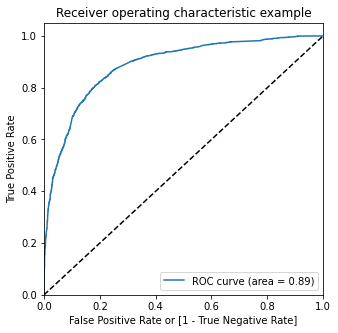

In [173]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The ROC curve has a good value of 0.89

In [174]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.203970,0,1,1,1,0,0,0,0,0,0,0
1,0,0.078901,0,1,0,0,0,0,0,0,0,0,0
2,0,0.319361,0,1,1,1,1,0,0,0,0,0,0
3,1,0.867822,1,1,1,1,1,1,1,1,1,1,0
4,1,0.803867,1,1,1,1,1,1,1,1,1,1,0


In [175]:
#Creating a dataframe for accuracy, sensitivit, specificity and difference probability cut offs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.602425,0.971791,0.371063
0.2,0.2,0.749961,0.917416,0.645070
0.3,0.3,0.800346,0.847097,0.771063
0.4,0.4,0.817037,0.773508,0.844302
0.5,0.5,0.818611,0.709321,0.887068
0.6,0.6,0.800189,0.606296,0.921639
0.7,0.7,0.785703,0.529027,0.946479
0.8,0.8,0.760038,0.422322,0.971575
0.9,0.9,0.720831,0.295176,0.987452


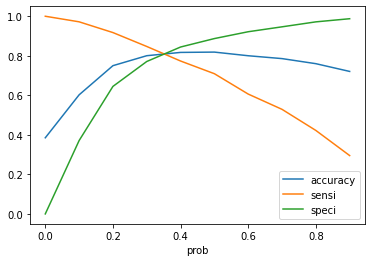

In [176]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

###### From the Above we Arrive at a CutOff of 0.35 

In [177]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.203970,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.078901,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.319361,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.867822,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.803867,1,1,1,1,1,1,1,1,1,1,0,1


In [178]:
conf_Train = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
conf_Train

array([[3180,  725],
       [ 466, 1980]], dtype=int64)

In [179]:
TP = conf_Train[1,1]
TN = conf_Train[0,0]
FP = conf_Train[0,1] 
FN = conf_Train[1,0]


In [180]:
#Sensitivity
TP/(TP+FN)

0.8094848732624693

In [181]:
#Specificity
TN/(TN+FP)

0.8143405889884763

In [182]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.812470477090222

##### FOR THE TRAINING SET the MODEL HAS Accuracy 81.24  | Sensitivity 80.9  | Specificity 81.4  

###### TRAINING SET - Precision and REcall TradeOff

In [183]:
##Precision
TP / (TP + FP)

0.7319778188539742

In [184]:
### Recall 
TP / (TP + FN)

0.8094848732624693

In [185]:
from sklearn.metrics import precision_recall_curve

In [186]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

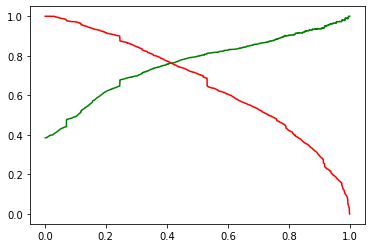

In [187]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Prediction of test set

In [188]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [189]:
col = X_train.columns

In [190]:
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test[col])
X_test_sm


,const,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
3271,1.0,0,79.392641,0,0,0,0,1,0,0,0,1,0,0,0
1490,1.0,0,775.475401,1,0,0,0,1,0,0,0,0,1,0,0
7936,1.0,0,36.785806,0,0,0,0,1,0,0,0,1,0,0,0
4216,1.0,0,-1.201012,0,0,1,0,1,0,0,0,0,0,1,0
3830,1.0,0,82.985989,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,1.0,0,424.354009,1,0,0,0,0,0,0,0,0,0,1,0
2879,1.0,0,301.153520,1,0,0,0,0,0,0,0,0,0,1,0
6501,1.0,0,684.101705,1,0,0,0,0,0,0,1,0,0,0,0
7155,1.0,0,263.166703,1,0,0,0,1,0,0,0,0,0,1,0


##### Predicting on the Test Set 

In [191]:
y_test_pred = res.predict(X_test_sm)

In [192]:
### Combining Y_Test and Y_Test_Pred to a common Dataframe

y_pred_df = pd.DataFrame(y_test_pred)

y_test_df = pd.DataFrame(y_test)
 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)


In [193]:
### Renaming the Column (0) to Conversion_Prob
 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,1.000000
1,1,1.000000
2,0,1.000000
3,1,0.754166
4,0,1.000000


In [194]:
### Updating the Final_Prediction with the Same CutOff as Training - 0.35 
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,1.000000,1
1,1,1.000000,1
2,0,1.000000,1
3,1,0.754166,1
4,0,1.000000,1
...,...,...,...
2718,0,1.000000,1
2719,0,1.000000,1
2720,1,1.000000,1
2721,0,1.000000,1


In [195]:
### Review Accoracy of the Test Set Prediction 

In [196]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.48255600440690416

In [197]:
conf_Test = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
conf_Test

array([[ 379, 1355],
       [  54,  935]], dtype=int64)

In [198]:
#True Positives
TP = conf_Test[1,1]
#True Negative
TN = conf_Test[0,0]
#False Positives
FP = conf_Test[0,1] 
#False Negatives
FN = conf_Test[1,0]

In [199]:
#Sensitivity
TP/(TP+FN)

0.9453993933265925

In [200]:
#Specificity
TN/(TN+FP)

0.2185697808535179

In [201]:
##Precision
TP / (TP + FP)

0.40829694323144106

In [202]:
### Recall 
TP / (TP + FN)

0.9453993933265925

##### FINAL OUTCOME

##### TRAIN SET   Accuracy 81.24 | Sensitivity 80.9 | Specificity 81.4  | Precision 73.1 | Recall 80.9

##### TEST SET  Accuracy 48.24 | Sensitivity 94.5 | Specificity 21.85  | Precision 40.8 | Recall 94.5 


###### Conclusion : Though the Model Accuracy of the Test Set is Low - We Can still go ahead with the Above Model 

The Sensitivity is High - That is Lead Conversion (Yes) - is correctly Predicted 

The Recall is also Very High - That is Though there are some false Negatives True Positivity Rate is very high

###### Thus the Model will tend to Identify more than 80% of the Leads that can be converted  correctly 
